In [1]:
## IMPORTS 

import pandas as pd
import numpy as np
from numpy import loadtxt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


In [2]:
# Load the CSV dataset into a pandas dataframe
df = pd.read_csv('/content/data_processed.csv')

In [3]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_1,neighbourhood_2,neighbourhood_3
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0,0.0,0.0,1.0
1,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0,0.0,0.0,1.0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0,-1.0,0.0,0.0
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0,1.0,0.0,0.0
4,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0,0.0,0.0,1.0


In [4]:
print('number of rows in the df:',len(df))
df.describe()

number of rows in the df: 47430


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_1,neighbourhood_2,neighbourhood_3
count,47430.000000,47430.000000,47430.000000,47430.000000,47430.000000,47430.000000,47430.000000,47430.000000,47430.000000,47430.000000,47430.000000,47430.000000,47430.000000,47430.000000,47430.000000,47430.000000,47430.000000,47430.00000,47430.000000
mean,40.728764,-73.951469,128.614274,6.977778,23.623445,1.100885,6.985241,110.738752,0.509340,0.466519,0.024141,0.022749,0.416825,0.434177,0.118511,0.007738,0.093443,-0.04805,0.275248
std,0.054912,0.046280,82.010047,20.375545,44.931821,1.605292,32.324994,130.823339,0.499918,0.498883,0.153488,0.149105,0.493039,0.495654,0.323216,0.087624,0.572403,0.50110,0.578335
min,40.499790,-74.244420,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.00000,-1.000000
25%,40.689700,-73.982470,68.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,40.722455,-73.955030,100.000000,2.000000,5.000000,0.380000,1.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,40.763317,-73.935325,170.000000,5.000000,24.000000,1.610000,2.000000,220.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000
max,40.913060,-73.712990,452.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [5]:
X=df.drop('price', axis=1)
y=df['price']

In [6]:
#TRAIN AND TEST SETS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
rf = RandomForestRegressor()

In [8]:
## Definition of a grid to find best parameters of random forest

param_grid = { 
    'n_estimators': [100,102],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'random_state' : [40,50],
    'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

param_gridbis = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 20, 30,50],
    'min_samples_split': [2,4,5, 10],
    'min_samples_leaf': [1, 2, 4,5]
}

In [ ]:
### GRID SEARCH 

grid_search = GridSearchCV(estimator=rf, param_grid=param_gridbis, cv= 5,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Optimal hyperparameters
print('Optimal hyperparameters:', grid_search.best_params_)

# Prediction on test sets with optimal hyperparameters
y_pred = grid_search.predict(X_test)

# RMSE on test dataset
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE on test dataset :', rmse)

In [9]:
# RANDOM FOREST with best model params

best_rf = RandomForestRegressor(n_estimators=400, max_depth = 50, min_samples_split = 4,min_samples_leaf =5,max_features='sqrt', bootstrap = True, random_state=42)
best_rf.fit(X_train, y_train)

## Predictions on test dataset
y_pred=best_rf.predict(X_test)

In [10]:
## METRICS to evaluate performance of the model

from sklearn import metrics
from sklearn.metrics import r2_score 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2 score:', r2_score(y_test.values.ravel(), y_pred))

Mean Absolute Error: 37.61438119606522
Mean Squared Error: 3107.854567089572
Root Mean Squared Error: 55.74813509965667
r2 score: 0.544118916196539


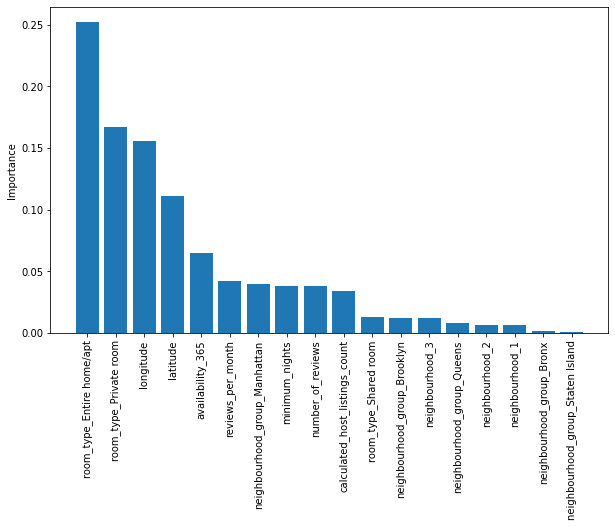

Top features: ['room_type_Entire home/apt', 'room_type_Private room', 'longitude', 'latitude', 'availability_365']


In [12]:
# FEATURES IMPORTANCES

rf_importances=best_rf.feature_importances_
df_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_importances})

# Ordering by decreasing order
df_importances = df_importances.sort_values('importance', ascending=False).reset_index(drop=True)

# Barplot
plt.figure(figsize=(10, 6))
plt.bar(df_importances['feature'], df_importances['importance'])
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.show()

# Sélectionner les variables les plus importantes (par exemple, les 5 premières)
top_features = df_importances['feature'][:5].tolist()
print('Top features:', top_features)